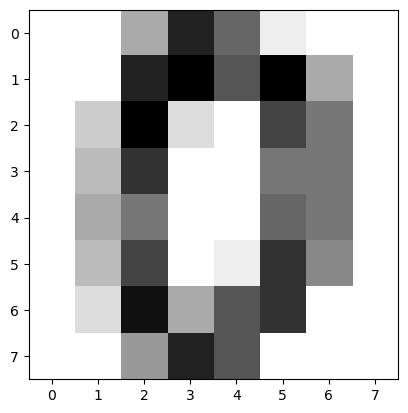

In [2]:
import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
import tensorflow.keras as keras

digits = datasets.load_digits()
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation='nearest')

In [3]:
EPOCHS = 5
BATCH_SIZE = 32

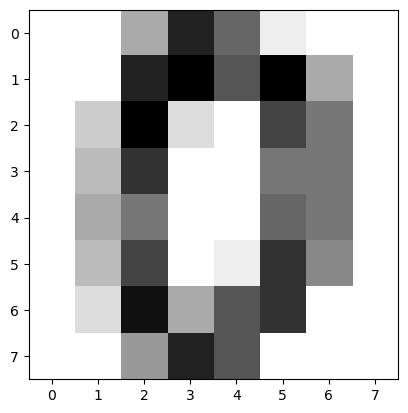

In [4]:
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [5]:
X = digits.images
y = digits.target
X = X.reshape(X.shape[0], 8, 8, 1)  # 이미지 형태 변환 (채널 추가)
y = to_categorical(y)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
model = keras.models.Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(8, 8, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [8]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
history = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/5
45/45 [==============================] - 3s 19ms/step - loss: 1.3657 - accuracy: 0.5901 - val_loss: 0.4787 - val_accuracy: 0.8694
Epoch 2/5
45/45 [==============================] - 0s 8ms/step - loss: 0.2882 - accuracy: 0.9311 - val_loss: 0.2332 - val_accuracy: 0.9333
Epoch 3/5
45/45 [==============================] - 0s 7ms/step - loss: 0.1464 - accuracy: 0.9715 - val_loss: 0.1360 - val_accuracy: 0.9778
Epoch 4/5
45/45 [==============================] - 0s 8ms/step - loss: 0.0995 - accuracy: 0.9833 - val_loss: 0.1041 - val_accuracy: 0.9778
Epoch 5/5
45/45 [==============================] - 0s 8ms/step - loss: 0.0726 - accuracy: 0.9882 - val_loss: 0.0985 - val_accuracy: 0.9750


In [10]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('테스트 세트 정확도:', test_acc)

12/12 [==============================] - 0s 4ms/step - loss: 0.0985 - accuracy: 0.9750
테스트 세트 정확도: 0.9750000238418579


In [11]:
predictions = model.predict(X_test)

print(predictions)
print(len(predictions))

12/12 [==============================] - 0s 3ms/step
[[4.67271020e-04 4.47608800e-05 1.85690136e-04 ... 3.25604742e-05
  2.66526151e-03 2.42548471e-04]
 [4.67802980e-04 7.47495724e-05 6.97569294e-06 ... 1.36745966e-05
  1.91390654e-03 9.71177638e-01]
 [2.42664498e-07 8.35918740e-07 6.85833948e-05 ... 1.06738835e-05
  1.58468945e-04 2.64051574e-04]
 ...
 [1.75965519e-03 6.20367564e-03 9.36326012e-03 ... 8.06139223e-03
  9.37387526e-01 3.12767625e-02]
 [9.53326188e-03 6.97700819e-03 8.23705196e-02 ... 9.53636190e-04
  2.20998060e-02 1.84184149e-01]
 [7.90577542e-05 1.97949030e-05 9.20209550e-06 ... 1.06047565e-07
  4.82869546e-05 9.07313172e-03]]
360


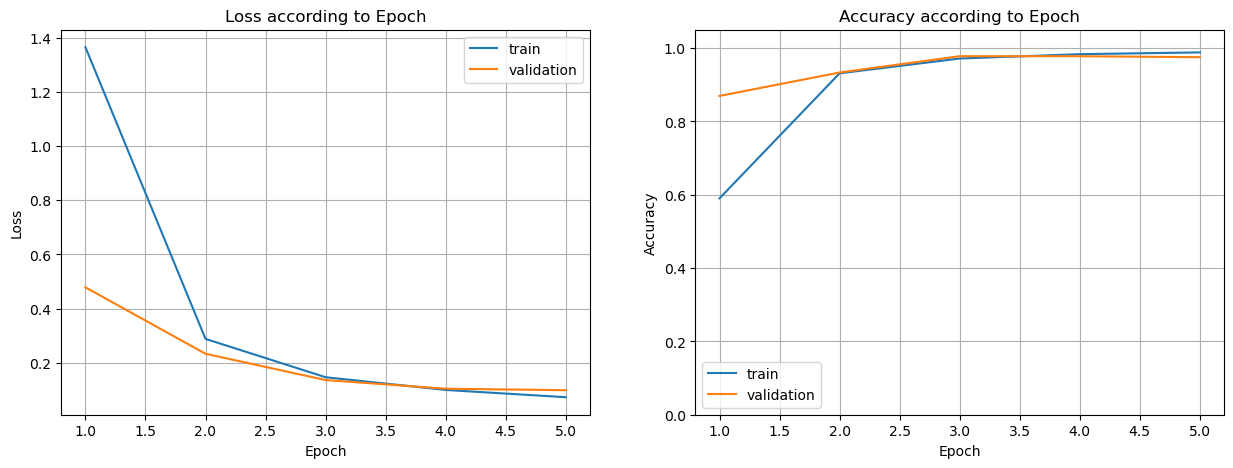

In [12]:
import pandas as pd

df_hist = pd.DataFrame(history.history)
df_hist['epoch'] = range(1, EPOCHS+1)

plt.figure(figsize=(15, 5))

plt.subplot(1,2,1)
plt.title('Loss according to Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(df_hist['epoch'], df_hist['loss'], label='train')
plt.plot(df_hist['epoch'], df_hist['val_loss'], label = 'validation')
# plt.ylim([0, 1.5])
plt.grid(True)
plt.legend()

plt.subplot(1,2,2)
plt.title('Accuracy according to Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(df_hist['epoch'], df_hist['accuracy'], label='train')
plt.plot(df_hist['epoch'], df_hist['val_accuracy'], label='validation')
plt.ylim(0, 1.05)
plt.grid(True)
plt.legend()

plt.show()